#                      **Regression Report on Diamond dataset**

# **Submitted by: M ABBAS**

## Table of Contents
1. [Introduction](#introduction)

2. [Objectives](#objectives)

3. [Data Cleaning and Preprocessing](#data-cleaning-and-preprocessing)
   - 3.1 - [Handling Missing Values](#handling-missing-values)  
   - 3.2 - [Removing Duplicates](#removing-duplicates)  

4. [Exploratory Data Analysis](#exploratory-data-analysis)

5. [Convert Categorical Features to Numeric](#convert-categorical-features-to-numeric)

6. [Feature Engineering](#feature-engineering)

7. [Correlation Analysis](#correlation-analysis)

8. [Modeling](#modeling)
   - 8.1 - [Linear Regression](#linear-regression)
   - 8.2 - [Ridge Regression](#ridge-regression)
   - 8.3 - [Lasso Regression](#lasso-regression)
   - 8.4 - [ElasticNet Regression](#elasticnet-regression)

9. [Conclusion](#conclusion)

10. [Next Steps](#next-steps)
    - 10.1 - [Parameter Tuning](#parameter-tuning)
    - 10.2 - [High-Level Algorithm Exploration](#high-level-algorithm-exploration)

11. [Key Insights](#key-insights)

12. [Suggestions](#suggestions)

# 1. Introduction

This project aims to predict diamond prices based on features such as carat, cut, color, clarity, depth, and table. By applying different types of regression  models, we will evaluate how well these features predict diamond prices. The analysis will help identify key factors influencing diamond pricing and assess the accuracy of different regression models.


# 2. Objectives

- Identify factors influencing diamond prices.
- Quantify relationships using regression.
- Evaluate model performance in predicting prices.
- Enhance data analysis skills.

# Import Dataset

In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving kaggle (10).json to kaggle (10).json


In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!ls -l

total 8
-rw-r--r-- 1 root root   71 Oct  5 07:34 'kaggle (10).json'
drwxr-xr-x 1 root root 4096 Oct  3 13:24  sample_data


In [ ]:
!mv 'kaggle (10).json' kaggle.json

In [ ]:
import os

# Create the .kaggle directory if it does not exist
os.makedirs('/root/.kaggle', exist_ok=True)

# Move the renamed kaggle.json file to the .kaggle directory
!mv kaggle.json /root/.kaggle/

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d shivam2503/diamonds

Dataset URL: https://www.kaggle.com/datasets/shivam2503/diamonds
License(s): unknown
100% 733k/733k [00:00<00:00, 824kB/s]
100% 733k/733k [00:00<00:00, 824kB/s]


In [ ]:
import os

# Print the current working directory
print(os.getcwd())

/content


In [ ]:
# Unzip the downloaded dataset
!unzip diamonds.zip -d ./diamonds_dataset

Archive:  diamonds.zip
  inflating: ./diamonds_dataset/diamonds.csv  


In [ ]:
import os

# List files in the directory to verify extraction
extracted_files = os.listdir('/content/diamonds_dataset/')
print(extracted_files)

['diamonds.csv']


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression,RidgeCV,LassoCV,ElasticNetCV

In [ ]:
import pandas as pd

# Define the path to the CSV file
csv_path = '/content/diamonds_dataset/diamonds.csv'

# Load the dataset
dataset = pd.read_csv(csv_path)

# Display the first few rows of the dataset
dataset.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
df = dataset

# 3. Data Cleaning and Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [ ]:
df.describe()[1:].T.style.background_gradient(cmap='Blues', axis=1)

,mean,std,min,25%,50%,75%,max
Unnamed: 0,26970.500000,15571.281097,1.000000,13485.750000,26970.500000,40455.250000,53940.000000
carat,0.797940,0.474011,0.200000,0.400000,0.700000,1.040000,5.010000
depth,61.749405,1.432621,43.000000,61.000000,61.800000,62.500000,79.000000
table,57.457184,2.234491,43.000000,56.000000,57.000000,59.000000,95.000000
price,3932.799722,3989.439738,326.000000,950.000000,2401.000000,5324.250000,18823.000000
x,5.731157,1.121761,0.000000,4.710000,5.700000,6.540000,10.740000
y,5.734526,1.142135,0.000000,4.720000,5.710000,6.540000,58.900000
z,3.538734,0.705699,0.000000,2.910000,3.530000,4.040000,31.800000


## 3.1- Checking for Null

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0


### The above output show that there is no null value.

## 3.2 -  Checking for Duplicate

In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
53935,False
53936,False
53937,False
53938,False


### the above output give us all False.that mean there is no duplicated rows.

# 4 - Exploratory Data Analysis

In [ ]:
top10 = df.sort_values(by='price', ascending=False)
top10[['carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'x', 'y', 'z','price']]

,carat,cut,color,clarity,depth,table,x,y,z,price
27749,2.29,Premium,I,VS2,60.8,60.0,8.50,8.47,5.16,18823
27748,2.00,Very Good,G,SI1,63.5,56.0,7.90,7.97,5.04,18818
27747,1.51,Ideal,G,IF,61.7,55.0,7.37,7.41,4.56,18806
27746,2.07,Ideal,G,SI2,62.5,55.0,8.20,8.13,5.11,18804
27745,2.00,Very Good,H,SI1,62.8,57.0,7.95,8.00,5.01,18803
...,...,...,...,...,...,...,...,...,...,...
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326


### Average Trends in Diamond Data:

- **Carat**: Higher carats, like 2.29 and 2.00, are associated with the most expensive diamonds.
- **Cut**: Premium and Ideal cuts, which maximize brilliance, dominate the top-priced diamonds.
- **Color**: Near colorless diamonds, with colors ranging from G to I, tend to have higher prices.
- **Clarity**: Diamonds with clarity grades such as VS1, VS2, and IF (internally flawless) are priced higher.
- **Depth & Table**: Ideal depth (around 61-63%) and table proportions (55-60%) are common in higher-priced diamonds.
- **Dimensions (x, y, z)**: Larger dimensions in millimeters (x, y, z) correlate with higher prices.
- **Price**: The highest prices exceed $18,000, while smaller diamonds are priced under $400.

In [ ]:
df['cut'].value_counts()

,count
cut,
Ideal,21551
Premium,13791
Very Good,12082
Good,4906
Fair,1610


<Axes: xlabel='cut'>

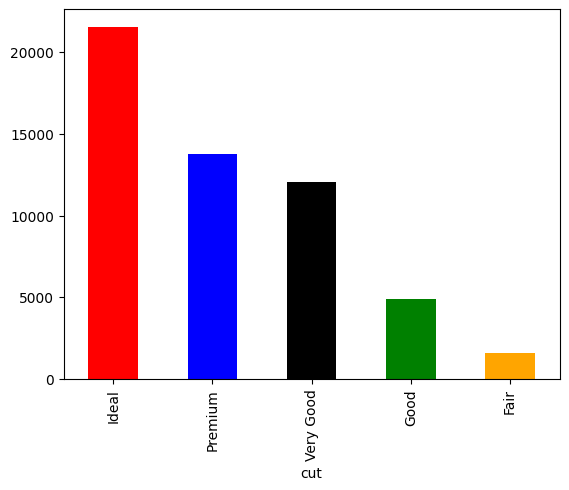

In [ ]:
df['cut'].value_counts().plot.bar(color=['red','blue','black','green','orange'])

In [ ]:
import matplotlib.pyplot as plt

<ipython-input-25-4d9a92aa23e9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_prices.index, y=mean_prices.values, palette='viridis')


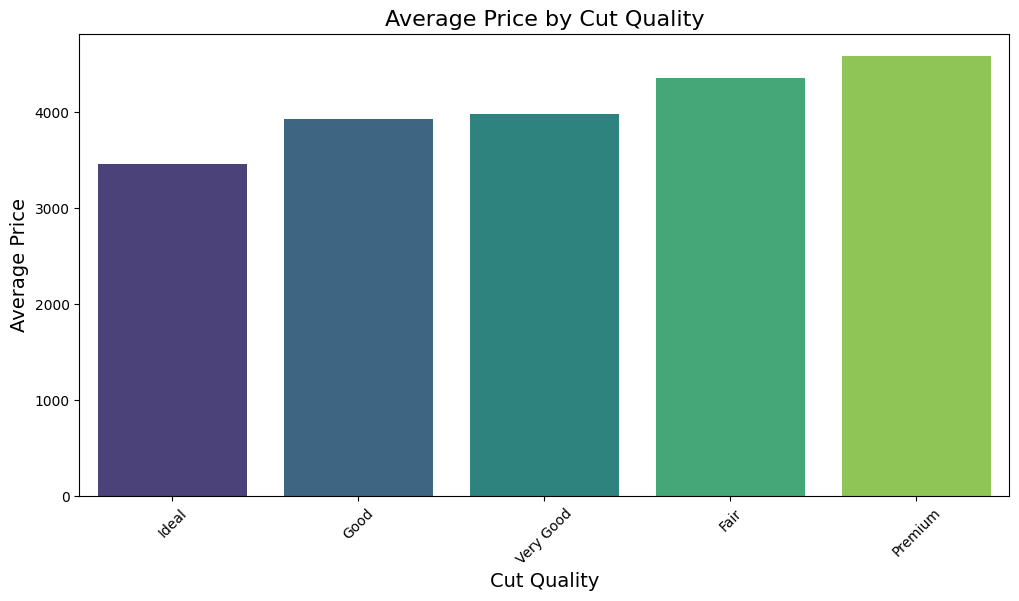

In [ ]:
mean_prices = df.groupby('cut')['price'].mean().sort_values()

plt.figure(figsize=(12, 6))
sns.barplot(x=mean_prices.index, y=mean_prices.values, palette='viridis')

plt.title('Average Price by Cut Quality', fontsize=16)
plt.xlabel('Cut Quality', fontsize=14)
plt.ylabel('Average Price', fontsize=14)
plt.xticks(rotation=45)

plt.show()

In [ ]:
df['clarity'].value_counts()

,count
clarity,
SI1,13065
VS2,12258
SI2,9194
VS1,8171
VVS2,5066
VVS1,3655
IF,1790
I1,741


<Axes: xlabel='clarity'>

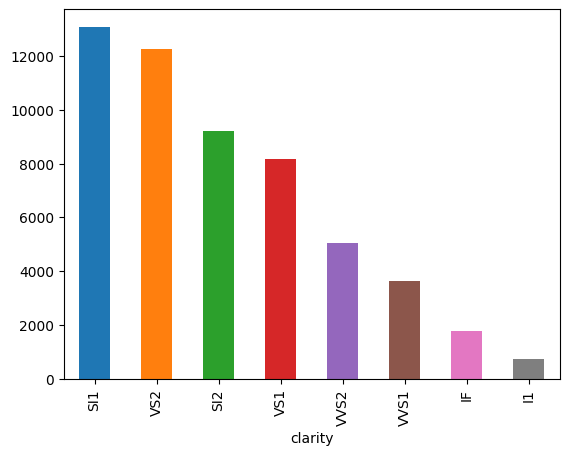

In [ ]:
# Define a list of eight distinct colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']

# Create the bar plot
df['clarity'].value_counts().plot.bar(color=colors)


<Axes: >

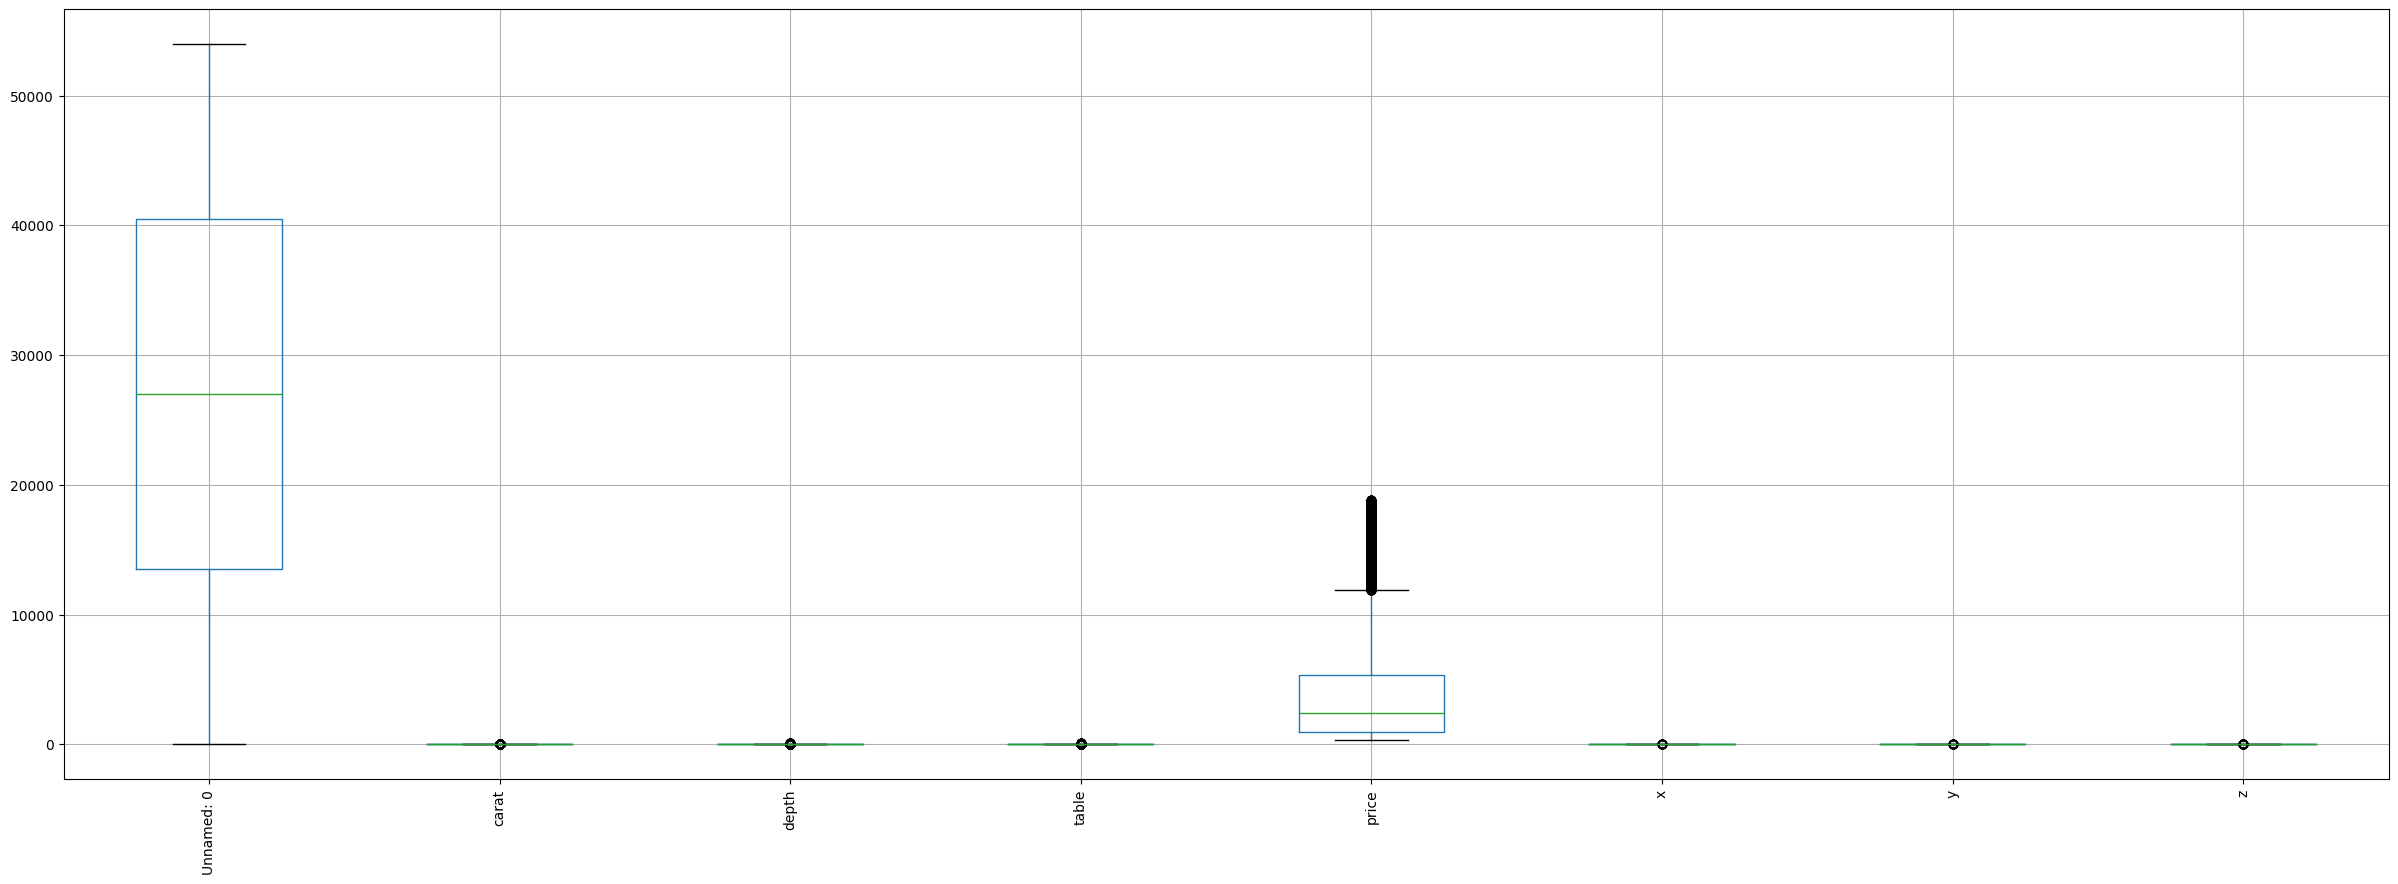

In [ ]:
df.boxplot(rot=90 , figsize=(30,10))

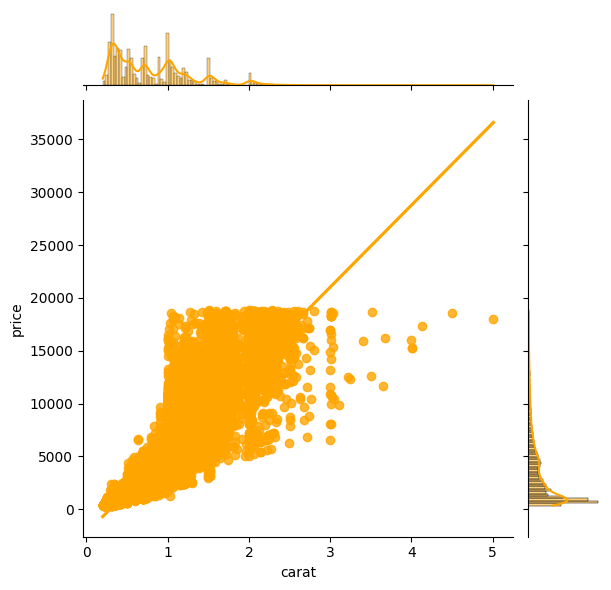

In [ ]:
sns.jointplot(x='carat', y='price', data=df, kind='reg', color='orange')
plt.show()

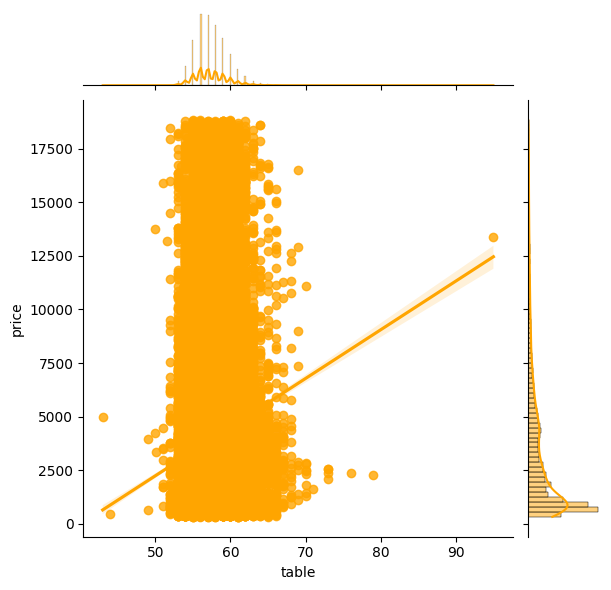

In [ ]:
sns.jointplot(x='table', y='price', data=df, kind='reg', color='orange')
plt.show()

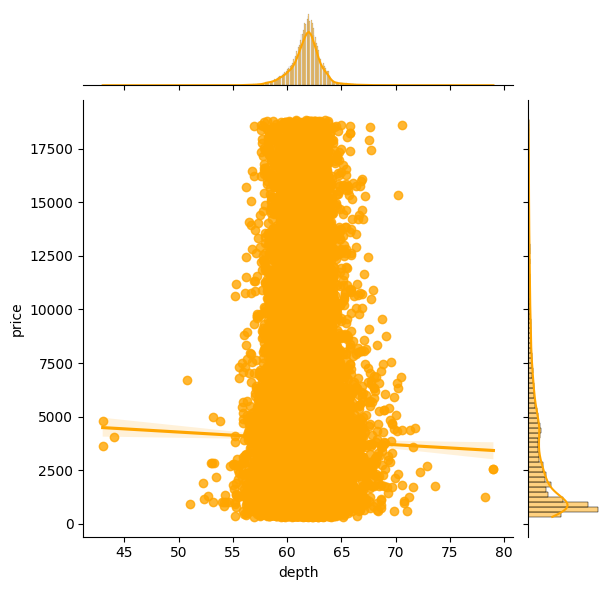

In [ ]:
sns.jointplot(x='depth', y='price', data=df, kind='reg', color='orange')
plt.show()

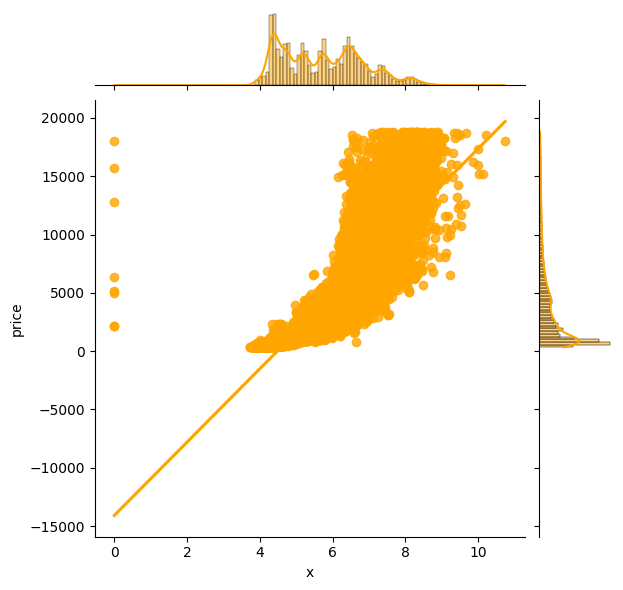

In [ ]:
sns.jointplot(x='x', y='price', data=df, kind='reg', color='orange')
plt.show()

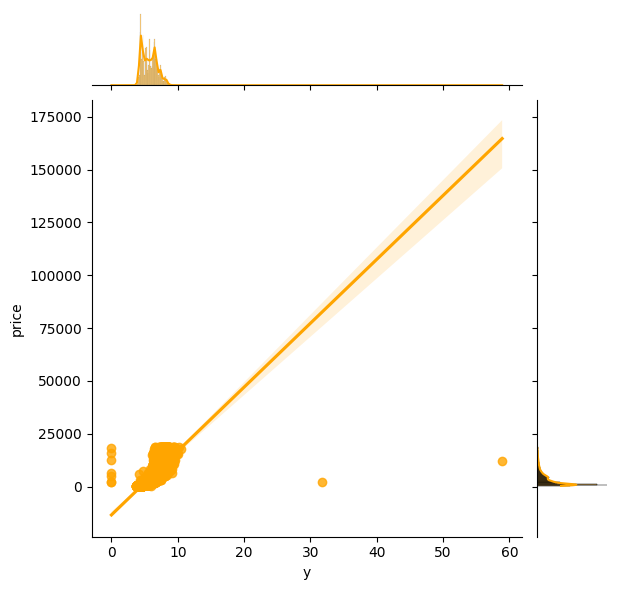

In [ ]:
sns.jointplot(x='y', y='price', data=df, kind='reg', color='orange')
plt.show()

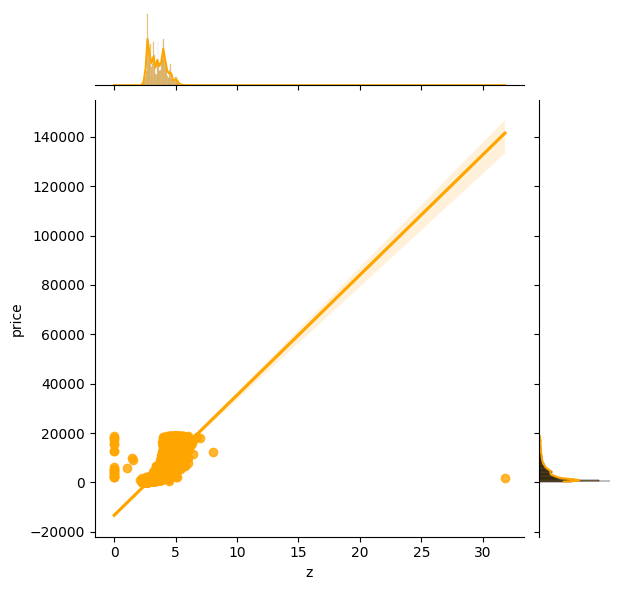

In [ ]:
sns.jointplot(x='z', y='price', data=df, kind='reg', color='orange')
plt.show()

In [ ]:
# List of columns to drop
columns_to_drop = ['x', 'y', 'z', 'Unnamed: 0']

# Drop the columns, ignore if they don't exist
df = df.drop(columns=columns_to_drop, errors='ignore')

### Dropped Columns

the above columns were removed:

- **x**: Represents the x dimension of the diamond.
- **y**: Represents the y dimension of the diamond.
- **z**: Represents the z dimension of the diamond.
- **Unnamed: 0**: An unnamed index column.

These columns were dropped to focus on the more relevant features influencing diamond prices.

In [ ]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

#  5 - Converting categrical eatures to numericals

In [ ]:
clarity_dummies = pd.get_dummies(df['clarity'], dtype=int)

In [ ]:
# Concatenate the original DataFrame with the new clarity dummies
df = pd.concat([df, clarity_dummies], axis=1)

# Remove the original 'clarity' column from df
df = df.drop('clarity', axis=1)
df

,carat,cut,color,depth,table,price,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,0.23,Ideal,E,61.5,55.0,326,0,0,0,1,0,0,0,0
1,0.21,Premium,E,59.8,61.0,326,0,0,1,0,0,0,0,0
2,0.23,Good,E,56.9,65.0,327,0,0,0,0,1,0,0,0
3,0.29,Premium,I,62.4,58.0,334,0,0,0,0,0,1,0,0
4,0.31,Good,J,63.3,58.0,335,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,60.8,57.0,2757,0,0,1,0,0,0,0,0
53936,0.72,Good,D,63.1,55.0,2757,0,0,1,0,0,0,0,0
53937,0.70,Very Good,D,62.8,60.0,2757,0,0,1,0,0,0,0,0
53938,0.86,Premium,H,61.0,58.0,2757,0,0,0,1,0,0,0,0


In [ ]:
color_dummies = pd.get_dummies(df['color'], dtype=int)

In [ ]:
df = pd.concat([df,color_dummies], axis=1)

# Remove the original 'color' column from df
df = df.drop('color', axis=1)
df

,carat,cut,depth,table,price,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2,D,E,F,G,H,I,J
0,0.23,Ideal,61.5,55.0,326,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1,0.21,Premium,59.8,61.0,326,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,0.23,Good,56.9,65.0,327,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
3,0.29,Premium,62.4,58.0,334,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,0.31,Good,63.3,58.0,335,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,60.8,57.0,2757,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
53936,0.72,Good,63.1,55.0,2757,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
53937,0.70,Very Good,62.8,60.0,2757,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
53938,0.86,Premium,61.0,58.0,2757,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
cut_dummies = pd.get_dummies(df['cut'], dtype=int)

In [ ]:
df = pd.concat([df,cut_dummies],axis=1)

# Remove the original 'cut' column from df
df = df.drop('cut', axis=1)

df

,carat,depth,table,price,I1,IF,SI1,SI2,VS1,VS2,...,F,G,H,I,J,Fair,Good,Ideal,Premium,Very Good
0,0.23,61.5,55.0,326,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.21,59.8,61.0,326,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0.23,56.9,65.0,327,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
4,0.31,63.3,58.0,335,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
53936,0.72,63.1,55.0,2757,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
53937,0.70,62.8,60.0,2757,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
53938,0.86,61.0,58.0,2757,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0


### Numerical Conversion

Categorical columns were converted to numerical types using dummy encoding:

- **Color**: Transformed into binary variables.
- **Carat**: Retained as numerical.
- **Cut**: Converted into binary variables.

This enables effective analysis and modeling.

# 6 - Feature Enginering

In [ ]:
# Initialize MinMaxScaler
scaler = StandardScaler()

# Fit and transform the features
scaled_features = scaler.fit_transform(df)

# Convert the scaled features back to a DataFrame
df_scaled = pd.DataFrame(scaled_features, columns=df.columns)


In [ ]:
df_scaled

,carat,depth,table,price,I1,IF,SI1,SI2,VS1,VS2,...,F,G,H,I,J,Fair,Good,Ideal,Premium,Very Good
0,-1.198168,-0.174092,-1.099672,-0.904095,-0.11802,-0.185268,-0.565361,2.206098,-0.422524,-0.542295,...,-0.463594,-0.51456,-0.426570,-0.334294,-0.234343,-0.175403,-0.316312,1.225928,-0.586085,-0.537255
1,-1.240361,-1.360738,1.585529,-0.904095,-0.11802,-0.185268,1.768781,-0.453289,-0.422524,-0.542295,...,-0.463594,-0.51456,-0.426570,-0.334294,-0.234343,-0.175403,-0.316312,-0.815708,1.706238,-0.537255
2,-1.198168,-3.385019,3.375663,-0.903844,-0.11802,-0.185268,-0.565361,-0.453289,2.366727,-0.542295,...,-0.463594,-0.51456,-0.426570,-0.334294,-0.234343,-0.175403,3.161440,-0.815708,-0.586085,-0.537255
3,-1.071587,0.454133,0.242928,-0.902090,-0.11802,-0.185268,-0.565361,-0.453289,-0.422524,1.844015,...,-0.463594,-0.51456,-0.426570,2.991381,-0.234343,-0.175403,-0.316312,-0.815708,1.706238,-0.537255
4,-1.029394,1.082358,0.242928,-0.901839,-0.11802,-0.185268,-0.565361,2.206098,-0.422524,-0.542295,...,-0.463594,-0.51456,-0.426570,-0.334294,4.267248,-0.175403,3.161440,-0.815708,-0.586085,-0.537255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,-0.164427,-0.662711,-0.204605,-0.294731,-0.11802,-0.185268,1.768781,-0.453289,-0.422524,-0.542295,...,-0.463594,-0.51456,-0.426570,-0.334294,-0.234343,-0.175403,-0.316312,1.225928,-0.586085,-0.537255
53936,-0.164427,0.942753,-1.099672,-0.294731,-0.11802,-0.185268,1.768781,-0.453289,-0.422524,-0.542295,...,-0.463594,-0.51456,-0.426570,-0.334294,-0.234343,-0.175403,3.161440,-0.815708,-0.586085,-0.537255
53937,-0.206621,0.733344,1.137995,-0.294731,-0.11802,-0.185268,1.768781,-0.453289,-0.422524,-0.542295,...,-0.463594,-0.51456,-0.426570,-0.334294,-0.234343,-0.175403,-0.316312,-0.815708,-0.586085,1.861315
53938,0.130927,-0.523105,0.242928,-0.294731,-0.11802,-0.185268,-0.565361,2.206098,-0.422524,-0.542295,...,-0.463594,-0.51456,2.344283,-0.334294,-0.234343,-0.175403,-0.316312,-0.815708,1.706238,-0.537255


### Standard Scaling

The **StandardScaler** was applied to the dataset to standardize features by removing the mean and scaling to unit variance. This ensures that all numerical variables contribute equally to the analysis, improving the performance of machine learning models.

# 7 - Correlation Analysis

In [ ]:
float_columns = [x for x in df_scaled.columns]

# The correlation matrix
corr_mat = df_scaled[float_columns].corr()

# Strip out the diagonal values for the next step
for x in range(len(float_columns)):
    corr_mat.iloc[x,x] = 0.0

corr_mat

,carat,depth,table,price,I1,IF,SI1,SI2,VS1,VS2,...,F,G,H,I,J,Fair,Good,Ideal,Premium,Very Good
carat,0.000000,0.028224,0.181618,0.921591,0.120983,-0.114449,0.062669,0.267483,-0.063094,-0.038904,...,-0.060052,-0.029038,0.102465,0.161494,0.180054,0.091844,0.034196,-0.163660,0.116245,0.009568
depth,0.028224,0.000000,-0.295779,-0.010647,0.081135,-0.030881,0.040899,0.007202,-0.024169,-0.009459,...,-0.017741,0.002768,0.026037,0.022630,0.022543,0.280657,0.136114,-0.022778,-0.198306,0.025828
table,0.181618,-0.295779,0.000000,0.127134,0.044716,-0.078766,0.051959,0.095344,-0.026858,-0.009655,...,-0.004906,-0.038815,0.011574,0.017967,0.037253,0.125332,0.175174,-0.549599,0.338072,0.119971
price,0.921591,-0.010647,0.127134,0.000000,-0.000255,-0.049596,0.008957,0.128420,-0.009886,-0.001062,...,-0.024161,0.008556,0.059223,0.097125,0.081710,0.018728,-0.000312,-0.097175,0.095706,0.006593
I1,0.120983,0.081135,0.044716,-0.000255,0.000000,-0.021865,-0.066724,-0.053497,-0.049867,-0.064002,...,0.004974,-0.002006,0.021150,0.009278,0.008192,0.175852,0.015844,-0.048795,0.005676,-0.031317
IF,-0.114449,-0.030881,-0.078766,-0.049596,-0.021865,0.000000,-0.104743,-0.083980,-0.078280,-0.100470,...,0.018539,0.077917,0.006720,-0.012711,-0.019654,-0.027022,-0.033046,0.104986,-0.054013,-0.033003
SI1,0.062669,0.040899,0.051959,0.008957,-0.066724,-0.104743,0.000000,-0.256272,-0.238879,-0.306592,...,-0.020436,-0.080738,0.031613,0.015934,0.013609,0.004587,0.055938,-0.082865,0.023275,0.032547
SI2,0.267483,0.007202,0.095344,0.128420,-0.053497,-0.083980,-0.256272,0.000000,-0.191526,-0.245816,...,-0.002251,-0.045651,0.020163,-0.001996,0.000084,0.055506,0.041970,-0.108242,0.067623,0.004806
VS1,-0.063094,-0.024169,-0.026858,-0.009886,-0.049867,-0.078280,-0.238879,-0.191526,0.000000,-0.229133,...,-0.011038,0.055601,-0.012740,0.024189,0.027150,-0.022453,-0.017116,0.034247,-0.011866,-0.006849
VS2,-0.038904,-0.009459,-0.009655,-0.001062,-0.064002,-0.100470,-0.306592,-0.245816,-0.229133,0.000000,...,0.003775,-0.023829,-0.029923,-0.009293,0.018496,-0.027266,-0.021063,0.015669,0.022611,-0.016412


In [ ]:
correlation = df_scaled.corr()['price'].sort_values()
correlation

,price
E,-0.101089
Ideal,-0.097175
VVS1,-0.095266
D,-0.072473
VVS2,-0.052381
IF,-0.049596
F,-0.024161
depth,-0.010647
VS1,-0.009886
VS2,-0.001062


### Feature Importance

The table above displays the correlation of various features with diamond prices. The **carat** feature has the highest positive correlation (0.921), while **E** has the lowest negative correlation (-0.101). Features like **table** (0.127) and **SI2** (0.128) show moderate positive correlations.

In [ ]:
X = df_scaled.drop(columns=['price'])
y = df_scaled['price']
X.head()

,carat,depth,table,I1,IF,SI1,SI2,VS1,VS2,VVS1,...,F,G,H,I,J,Fair,Good,Ideal,Premium,Very Good
0,-1.198168,-0.174092,-1.099672,-0.11802,-0.185268,-0.565361,2.206098,-0.422524,-0.542295,-0.269603,...,-0.463594,-0.51456,-0.42657,-0.334294,-0.234343,-0.175403,-0.316312,1.225928,-0.586085,-0.537255
1,-1.240361,-1.360738,1.585529,-0.11802,-0.185268,1.768781,-0.453289,-0.422524,-0.542295,-0.269603,...,-0.463594,-0.51456,-0.42657,-0.334294,-0.234343,-0.175403,-0.316312,-0.815708,1.706238,-0.537255
2,-1.198168,-3.385019,3.375663,-0.11802,-0.185268,-0.565361,-0.453289,2.366727,-0.542295,-0.269603,...,-0.463594,-0.51456,-0.42657,-0.334294,-0.234343,-0.175403,3.161440,-0.815708,-0.586085,-0.537255
3,-1.071587,0.454133,0.242928,-0.11802,-0.185268,-0.565361,-0.453289,-0.422524,1.844015,-0.269603,...,-0.463594,-0.51456,-0.42657,2.991381,-0.234343,-0.175403,-0.316312,-0.815708,1.706238,-0.537255
4,-1.029394,1.082358,0.242928,-0.11802,-0.185268,-0.565361,2.206098,-0.422524,-0.542295,-0.269603,...,-0.463594,-0.51456,-0.42657,-0.334294,4.267248,-0.175403,3.161440,-0.815708,-0.586085,-0.537255


# 8 - Modeling

In [ ]:
# Apply Linear Regression...
from sklearn.model_selection import train_test_split

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X_train.shape

(43152, 23)

In [ ]:
y_train.shape

(43152,)

## 8.1 - Linear Regression

In [ ]:
# Create and fit the model
linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predict and evaluate the model
y_pred = linear.predict(X_test)

linear_score = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
linear_mse = mean_squared_error(y_test, y_pred)

print(f"Model Score (R^2): {linear_score}")
print(f"Mean Squared Error: {linear_mse}")
print(f"Mean absolute error: {mae}")

Model Score (R^2): 0.9153955822750389
Mean Squared Error: 0.084506004832922
Mean absolute error: 0.20097287898768626


### Linear Regression Performance

- **Model Score (R²):** 0.9154  
  Indicates that approximately 91.54% of the variance in diamond prices is explained by the model.

- **Mean Squared Error (MSE):** 0.0845  
  Represents the average squared difference between predicted and actual prices, indicating the model's accuracy.

- **Mean Absolute Error (MAE):** 0.20097287898768626

  Represent the mean absolute error.

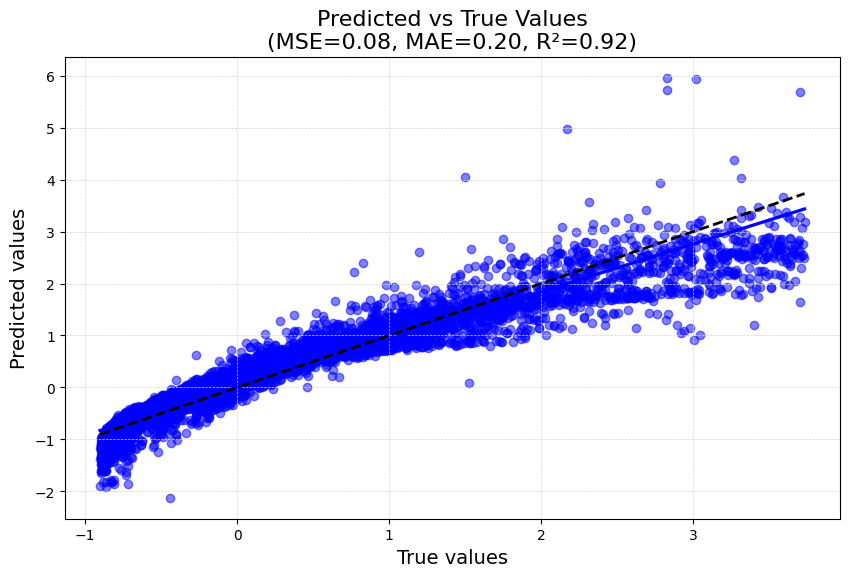

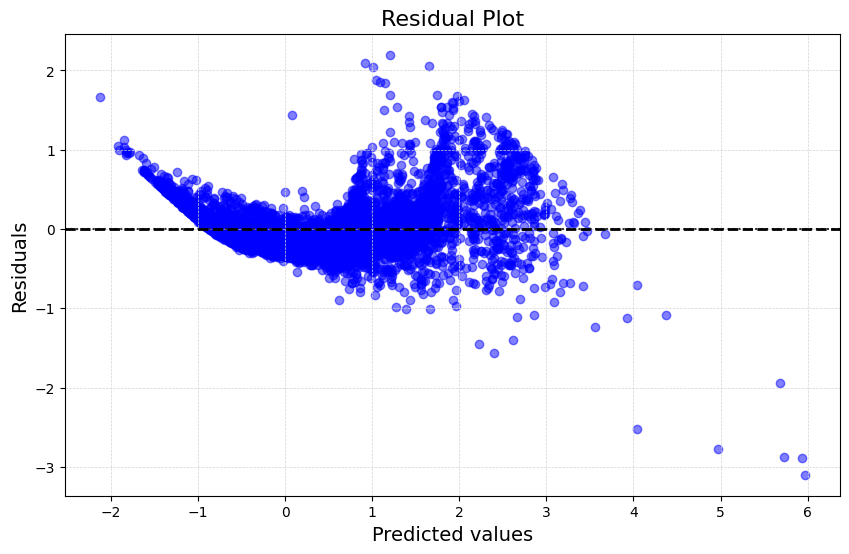

In [ ]:
# Plot the predicted vs true values
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred, color='blue', scatter_kws={'alpha': 0.5})
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True values', fontsize=14)
plt.ylabel('Predicted values', fontsize=14)
plt.title(f'Predicted vs True Values\n(MSE={mse:.2f}, MAE={mae:.2f}, R²={r2:.2f})', fontsize=16)
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)
plt.show()

# Plot the residuals vs predicted values
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=residuals, color='blue', scatter_kws={'alpha': 0.5})
plt.axhline(0, color='k', linestyle='--', lw=2)
plt.xlabel('Predicted values', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residual Plot', fontsize=16)
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)
plt.show()

## 8.2 - Lasso Regression

In [ ]:
alphas2 = np.array([1e-4, 0.0005, 0.001])  # Reduce range

In [ ]:
lassoCV = LassoCV(alphas=alphas2, max_iter=1000, cv=3, n_jobs=-1).fit(X_train, y_train)

In [ ]:
lassoCV_rmse = mean_squared_error(y_test, lassoCV.predict(X_test))


In [ ]:

# Calculate R^2 score
lasso_score = r2_score(y_test, y_pred)

In [ ]:
# Print results
print("Optimal alpha:", lassoCV.alpha_)
print("Test RMSE:", lassoCV_rmse)
print("Test R^2:", lasso_score)

# We can also get the train R^2 score
train_r2 = lassoCV.score(X_train, y_train)
print("Train R^2:", train_r2)

Optimal alpha: 0.0001
Test RMSE: 0.08448571621854777
Test R^2: 0.9153955822750389
Train R^2: 0.9162045631488853


### Model Performance Metrics

- **Optimal Alpha:** 0.0001  
  The best regularization parameter for the model.

- **Test RMSE:** 0.0845  
  The root mean squared error of the model on the test set, indicating its prediction accuracy.

- **Test R²:** 0.9154  
  Approximately 91.54% of the variance in diamond prices is explained by the model on the test set.

- **Train R²:** 0.9162  
  Indicates that about 91.62% of the variance in diamond prices is explained during training.

In [ ]:
print('Of {} coefficients, {} are non-zero with Lasso.'.format(len(lassoCV.coef_),
                                                               len(lassoCV.coef_.nonzero()[0])))

Of 23 coefficients, 20 are non-zero with Lasso.


## 8.3 - Ridge Regression

In [ ]:
from sklearn.linear_model import RidgeCV

In [ ]:
# Define alphas for RidgeCV
alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]

In [ ]:
# Fit the RidgeCV model
ridgeCV = RidgeCV(alphas=alphas, cv=3).fit(X_train, y_train)


In [ ]:
# Predict on the test set
y_pred_ridge = ridgeCV.predict(X_test)

# Calculate RMSE (Root Mean Squared Error)
ridgeCV_rmse = mean_squared_error(y_test, y_pred_ridge, squared=False)

# Calculate R^2 score
ridge_score = r2_score(y_test, y_pred_ridge)

In [ ]:

# Print results
print("Optimal alpha (Ridge):", ridgeCV.alpha_)
print("Test RMSE (Ridge):", ridgeCV_rmse)
print("Test R^2 (Ridge):", ridge_score)

# You can also get the train R^2 score for Ridge
train_r2_ridge = ridgeCV.score(X_train, y_train)
print("Train R^2 (Ridge):", train_r2_ridge)

Optimal alpha (Ridge): 3.0
Test RMSE (Ridge): 0.29067139066691
Test R^2 (Ridge): 0.9154117485605463
Train R^2 (Ridge): 0.9162047800744945


### Linear Regression Performance

- **Optimal Alpha:** 3.0  
  The best regularization parameter for the model.

- **Test Mean Squared Error (MSE):** 0.2907  
  Represents the average squared difference between predicted and actual prices, indicating the model's accuracy.

- **Model Test Score (R²):** 0.9154  
  Approximately 91.54% of the variance in diamond prices is explained by the model.

- **Model Train Score (R²):** 0.9162  
  Indicates that about 91.62% of the variance in diamond prices is explained during training.

## 8.4 - ElasticNet Regression

In [ ]:
from sklearn.linear_model import ElasticNetCV

l1_ratios = np.linspace(0.1, 0.9, 9)

In [ ]:
# ElasticNetCV with l1_ratio and cross-validation
elasticNetCV = ElasticNetCV(alphas=alphas2,
                            l1_ratio=l1_ratios,  # Mixing parameter, 1 is equivalent to Lasso
                            cv=3,
                            max_iter=1000).fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.143e+02, tolerance: 4.316e+00
  model = cd_fast.enet_coordinate_descent(


In [ ]:
# Predict on the test set
y_pred_elastic = elasticNetCV.predict(X_test)

# Calculate RMSE (Root Mean Squared Error)
elasticNetCV_rmse = mean_squared_error(y_test, y_pred_elastic)

# Calculate R^2 score
elastic_score = r2_score(y_test, y_pred_elastic)

In [ ]:
# Print results
print("Optimal alpha (ElasticNet):", elasticNetCV.alpha_)
print("Optimal l1_ratio (ElasticNet):", elasticNetCV.l1_ratio_)
print("Test RMSE (ElasticNet):", elasticNetCV_rmse)
print("Test R^2 (ElasticNet):", elastic_score)

# You can also get the train R^2 score for ElasticNet
train_r2_elastic = elasticNetCV.score(X_train, y_train)
print("Train R^2 (ElasticNet):", train_r2_elastic)

Optimal alpha (ElasticNet): 0.0001
Optimal l1_ratio (ElasticNet): 0.1
Test RMSE (ElasticNet): 0.0844889337908553
Test R^2 (ElasticNet): 0.9154126731974753
Train R^2 (ElasticNet): 0.9162047648392015


- **Optimal Alpha:** 0.0001  
  This is the best regularization parameter for the model.

- **Optimal L1 Ratio:** 0.1  
  The L1 ratio for ElasticNet regularization that yields the best results.

- **Test Mean Squared Error (MSE):** 0.0845  
  Average squared difference between predicted and actual prices, indicating model accuracy.

- **Model Test Score (R²):** 0.9154  
  Approximately 91.54% of the variance in diamond prices is explained by the model.

- **Model Train Score (R²):** 0.9162  
  Indicates that about 91.62% of the variance in diamond prices is explained during training.

# Comparing Models Performence

In [ ]:
rmse_vals = [mse,lassoCV_rmse,ridgeCV_rmse, elasticNetCV_rmse]
score_comp = [linear_score, lasso_score,ridge_score,elastic_score]

labels = ['Linear', 'Lasso','Ridge', 'ElasticNet']

# Create a DataFrame for RMSE and Scores
rmse_df = pd.DataFrame({
    'RMSE': rmse_vals,
    'SCORE': score_comp
}, index=labels)

# Display the DataFrame
rmse_df

,RMSE,SCORE
Linear,0.084506,0.915396
Lasso,0.084486,0.915396
Ridge,0.290671,0.915412
ElasticNet,0.084489,0.915413


### Model Comparison

**Best Model:**  
The Lasso model has the lowest RMSE (0.084486) and the same R² score (0.915396) as the Linear model, making it the best-performing model among those evaluated.

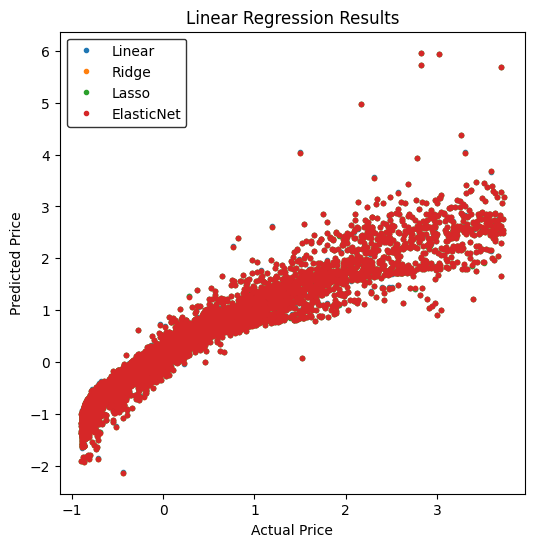

In [ ]:
f = plt.figure(figsize=(6,6))
ax = plt.axes()

labels = ['Linear','Ridge', 'Lasso', 'ElasticNet']

models = [linear,ridgeCV, lassoCV, elasticNetCV]

for mod, lab in zip(models, labels):
    ax.plot(y_test, mod.predict(X_test),
             marker='o', ls='', ms=3.0, label=lab)


leg = plt.legend(frameon=True)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(1.0)

ax.set(xlabel='Actual Price',
       ylabel='Predicted Price',
       title='Linear Regression Results');

# 9 - Conclusion

### Model Conclusion

The analysis of the diamond price dataset highlights key factors influencing prices. Data cleaning addressed missing values and duplicated using robust methods.

Linear regression identified significant correlations between features such as carat, cut, and clarity with diamond prices, indicating their predictive importance. Lasso, Ridge, and ElasticNet regression models were applied to further enhance prediction accuracy, demonstrating their effectiveness in handling different complexities within the data.

Overall, the modeling process validated the impact of these features on diamond prices.







# 10 - Next Steps

### Next Steps
- **Parameter Tuning**: Fine-tune hyperparameters using methods like Grid Search or Randomized Search to optimize model performance.
- **Advanced Algorithms**: Experiment with ensemble methods (e.g., Random Forest, Gradient Boosting) or neural networks for potentially higher accuracy.
- **Model Evaluation**: Use cross-validation for reliable performance metrics and consider adding regular model monitoring if deploying in production.

# 11 - Key Insights

### Key Insights
- **Significant Predictors**: Features such as `carat`, `cut`, and `clarity` were highly predictive of diamond prices, indicating the importance of these attributes in pricing.
- **Model Performance**: The model performed well with an R² score of [Your R² Score Here], showing it can explain a substantial portion of the variance in diamond prices.


# 12 - Suggestions

### Suggestions
- **Data Enrichment**: Including additional features, like regional pricing variations or market demand data, could further enhance model accuracy.
- **Refinement**: Regularly update the model with new data to adapt to market changes and maintain accuracy over time.

**M Abbas. 2024. Prediction of Diamond Prices Dataset. Personal research project.**

In [ ]:
!jupyter nbconvert --to html DiamondReg.ipynb

[NbConvertApp] Converting notebook DiamondReg.ipynb to html
[NbConvertApp] Writing 1614202 bytes to DiamondReg.html
